In [1]:
import sys
sys.path.append('../')

import numpy as np
import pygme
from pygme.phc import PhotCryst, Lattice
from pygme.shapes import Square, Circle, Poly

%load_ext autoreload
%autoreload 2

from pygme.gme import GuidedModeExp
from pygme.utils import plot_reciprocal

## Initialize a photonic crystal

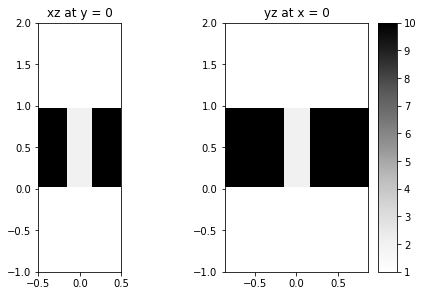

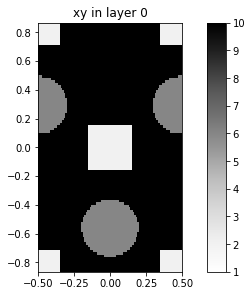

In [4]:
# Initialize a lattice (can be 'square', 'hexagonal', or defined by primitive vectors)
lattice = Lattice('hexagonal')
# Initialize a PhC (optional permittivity in the lower and upper cladding)
phc = PhotCryst(lattice, eps_l=1., eps_u=1.)
# Add a layer to the PhC with thickness 1 and background permittivity 10
phc.add_layer(d=1, eps_b=10)

# We can add shapes to the layer in two different ways:

# Create a square and use the layer `add_shape` method
square = Square(x_cent=0, y_cent=0, a=0.3, eps=2)
phc.layers[-1].add_shape(square)

# Create a circle and use the phc `add_shape` method
circle = Circle(eps=6, x_cent=0.5, y_cent=0.3, r=0.2)
phc.add_shape(circle) # by default added to the last layer

# We can plot an overview of what we've built so far
phc.plot_overview()

## Compare to FT
Both PWE and GME use the Fourier transform (FT) of the shapes. When we initialize a GME object, this FT is computed up to a truncation order defined by `gmax`. We can then inverse transform back to real space and see what it is we are simulating.  

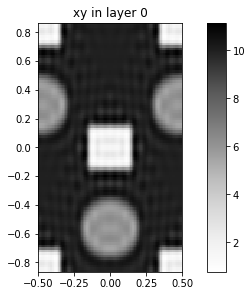

In [5]:
gme = GuidedModeExp(phc, gmax=5)
gme.plot_overview_ft()

## Polygon shapes

The `Poly` class allows you to do some cool things. You can define an arbitrary-shaped object (you can put as many points as you want in the polygon). Also, you can rotate the polygon with respect to its center of mass.

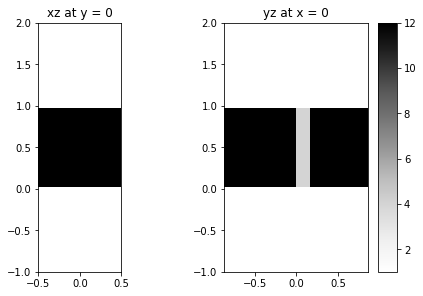

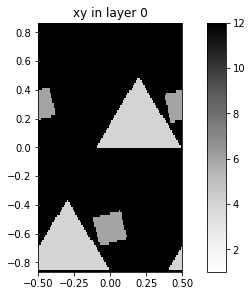

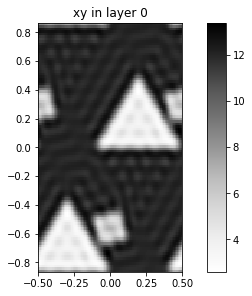

In [6]:
# Initialize the PhC with a single Layer
phc = PhotCryst(lattice)
phc.add_layer(d=1, eps_b=12)
square = Square(eps=6, x_cent=0.5, y_cent=0.3, a=0.2)

# The Square class is already a subclass of Poly, so it can be rotated
square.rotate(angle=np.pi/12) 
phc.add_shape(square)

# We can also add an arbitrary polygon, e.g. a triangle
triangle = Poly(x_edges=[-0.1, 0.5, 0.2], y_edges=[0, 0, 0.5], eps=4)
phc.add_shape(triangle)

# Plot the real-space overview
phc.plot_overview()

# And the overview based on inverse fourier transform
gme = GuidedModeExp(phc, gmax=5)
gme.plot_overview_ft()

## Multiple layers

We can also simulate a multi-layer structure! However, this should be taken with a grain of salt and might not always work as well as the single-layer simulation. 

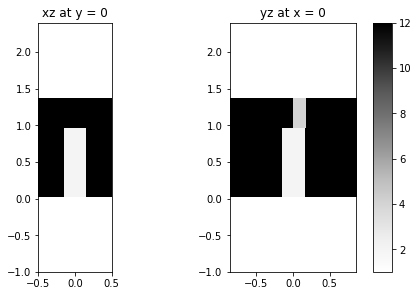

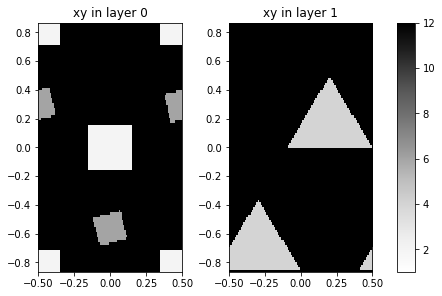

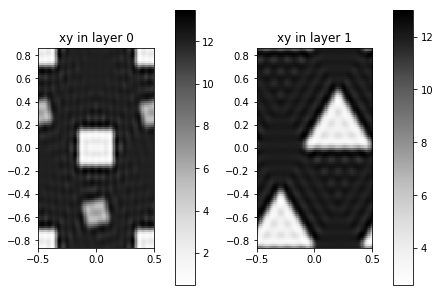

In [5]:
# Arbitrary polygon 
phc.add_layer(d=0.4, eps_b=12)
phc.layers[-1].add_shape('poly', {'x_edges': [-0.1, 0.5, 0.2], 'y_edges': [0, 0, 0.5], 'eps': 4})
phc.plot_overview()
gme = GuidedModeExp(phc, gmax=5)
gme.plot_overview_ft()

## Caveats

There are two important things to keep in mind:
- Shapes should not overlap.
- Polygons should be defined such that the points circle their interior in a counter-clockwise manner.

There could be fixes for this in the future dunno... But here's what happens if you mess up.

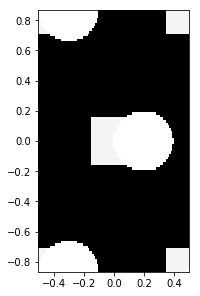

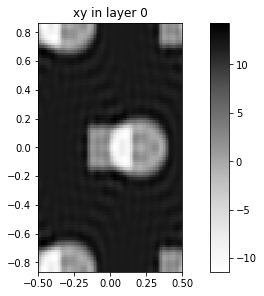

In [6]:
phc = PhotCryst(lattice)
phc.add_layer(d=1, eps_b=12)
phc.add_shape('square', {'x_cent': 0, 'y_cent': 0, 'a': 0.3, 'eps': 2})
phc.add_shape('circle', {'x': 0.2, 'y': 0, 'r': 0.2, 'eps': 1})

phc.plot_cross()

gme = GuidedModeExp(phc, gmax=5)
gme.plot_overview_ft()

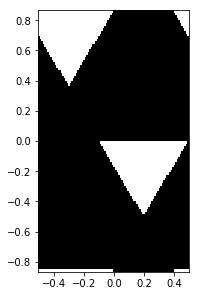

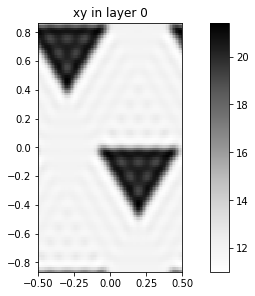

In [7]:
phc = PhotCryst(lattice)
phc.add_layer(d=1, eps_b=12)
phc.add_shape('poly', {'x_edges': [-0.1, 0.5, 0.2], 'y_edges': [0, 0, -0.5], 'eps': 4})

phc.plot_cross()

gme = GuidedModeExp(phc, gmax=5)
gme.plot_overview_ft()